In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('andet_data/Retirement_Age_Table.csv')[['Retirement Age', 'Generation']]
df['Year'] = df['Retirement Age'] + df['Generation']
df['Locked at 70'] = df['Retirement Age'].where(df['Retirement Age'] < 70, 70)
# Plot with step to reflect retirement policy changes

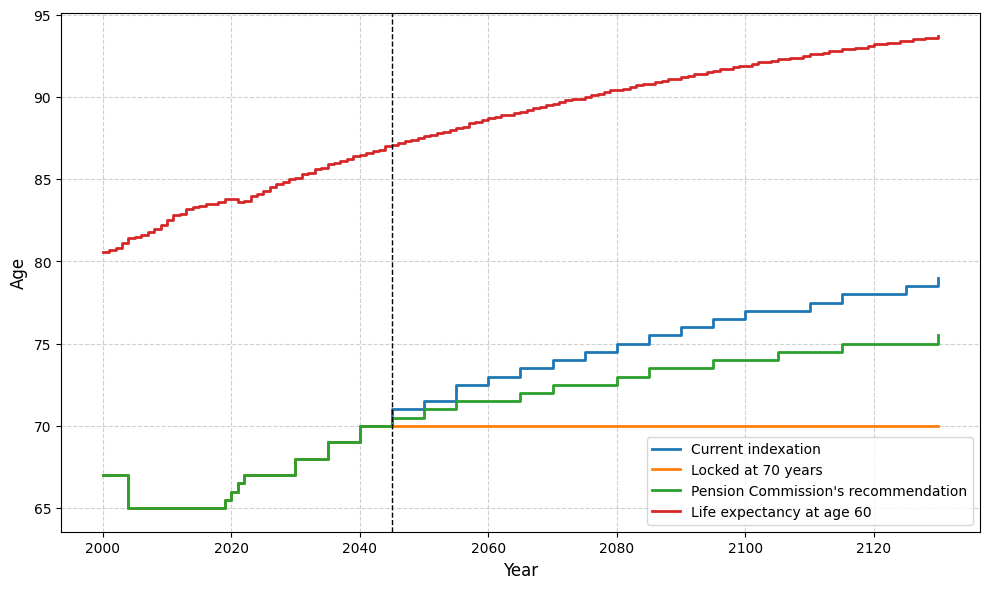

In [2]:
df = pd.read_excel('andet_data/dataark-figurer-og-tabeller.xlsx', sheet_name="Boks 1.4, Figur a", header=None).iloc[4:9,1:].T
df.columns = ['Year', 
 'Current indexation', 
 'Locked at 70 years', 
 "Pension Commission's recommendation", 
 'Life expectancy at age 60']

df = df.iloc[1:,:]
color_dict = {
    'Current Indexation': '#1f77b4',                      # Blue
    'Locked at 70 years': '#ff7f0e',                      # Orange
    "The pension Comittee's recommendation": '#2ca02c',   # Green
    "Expected life time of a 60 year-old": '#d62728'      # Red
}

plt.figure(figsize=(10, 6))

for the_str in df.columns[1:]:
    if the_str == 'Expected life time of a 60 year-old':
        # Force smooth by setting drawstyle='default' explicitly
        plt.plot(df['Year'], df[the_str], linewidth=2, label=the_str, drawstyle='default')
    else:
        plt.plot(df['Year'], df[the_str], linewidth=2, label=the_str, drawstyle='steps-post')

# plt.axvline(x=2025, color='black', linestyle='--', linewidth=1)
plt.axvline(x=2045, color='black', linestyle='--', linewidth=1)


# Style
plt.xlabel('Year', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
output_dir = 'pictures'
os.makedirs(output_dir, exist_ok=True)
# Save plot
output_path = os.path.join(output_dir, 'retirement_ages.png')
plt.savefig(output_path, dpi=300)
plt.show()


<BarContainer object of 3 artists>

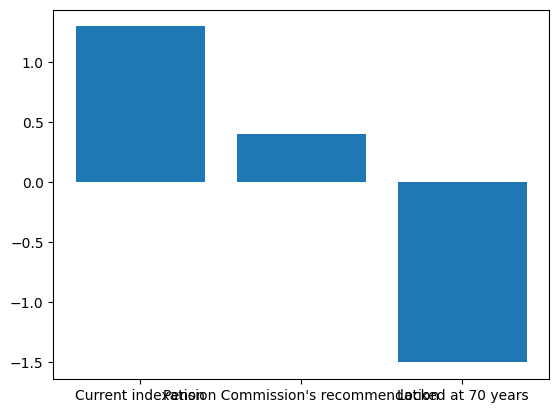

In [3]:
df = pd.read_excel('andet_data/dataark-figurer-og-tabeller.xlsx', sheet_name="Boks 1.4, Figur b", header=None).iloc[5:-1,1:3].T
df.drop(df.index[0], inplace=True)
df.columns = [ 'Current indexation',  "Pension Commission's recommendation",'Locked at 70 years']
plt.bar(df.columns, df.iloc[0])

In [4]:
df

,Current indexation,Pension Commission's recommendation,Locked at 70 years
2,1.3,0.4,-1.5


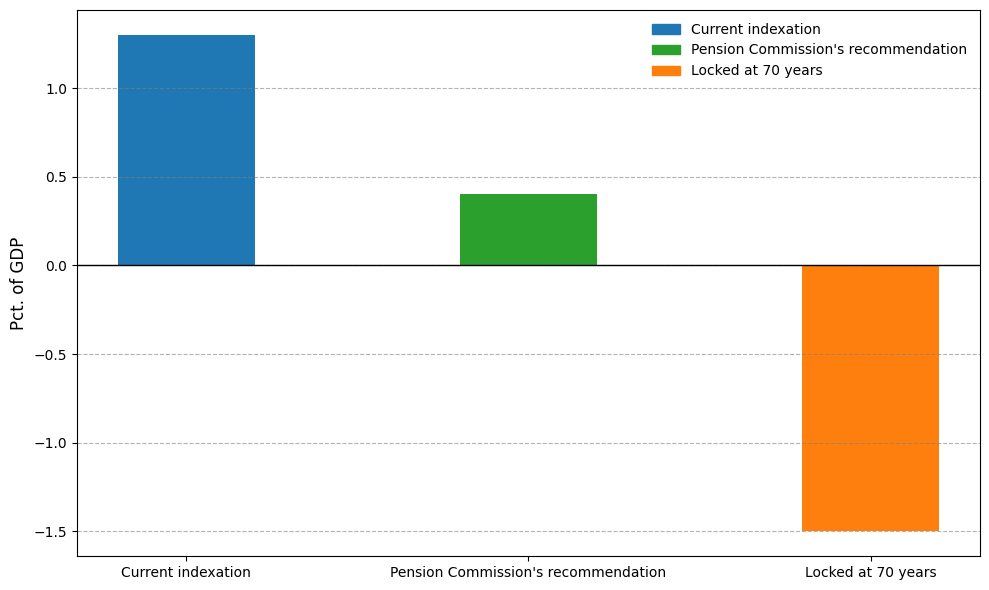

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch

# Load and prep data
df = pd.read_excel('andet_data/dataark-figurer-og-tabeller.xlsx', sheet_name="Boks 1.4, Figur b", header=None).iloc[5:-1,1:3].T
df.drop(df.index[0], inplace=True)
df.columns = ['Current indexation', "Pension Commission's recommendation", 'Locked at 70 years']
df = df.astype(float)

# Color mapping
color_map = {
    'Current indexation': '#1f77b4',
    "Pension Commission's recommendation": '#2ca02c',
    'Locked at 70 years': '#ff7f0e'
}
bar_colors = [color_map[col] for col in df.columns]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df.columns, df.iloc[0], color=bar_colors, width=0.4)

# Axes labels and grid
plt.ylabel('Pct. of GDP', fontsize=12)
plt.axhline(y=0, color='black', linewidth=1)
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.6)

# Custom legend (no box)
custom_labels = list(df.columns)
handles = [Patch(color=color_map[label], label=label) for label in custom_labels]
plt.legend(handles=handles, frameon=False, loc='upper right', fontsize=10)
# Ticks and layout
plt.xticks(rotation=0)
plt.tight_layout()

# Save figure
output_dir = 'pictures'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'Holdbarhedsindikator.png')
plt.savefig(output_path, dpi=300)

plt.show()
